In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from lexical_reflections.utils.device import DEVICE

model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B")
model.to(DEVICE)
model.eval()
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B")

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

Data len:  50


100%|██████████| 50/50 [00:08<00:00,  5.56it/s]


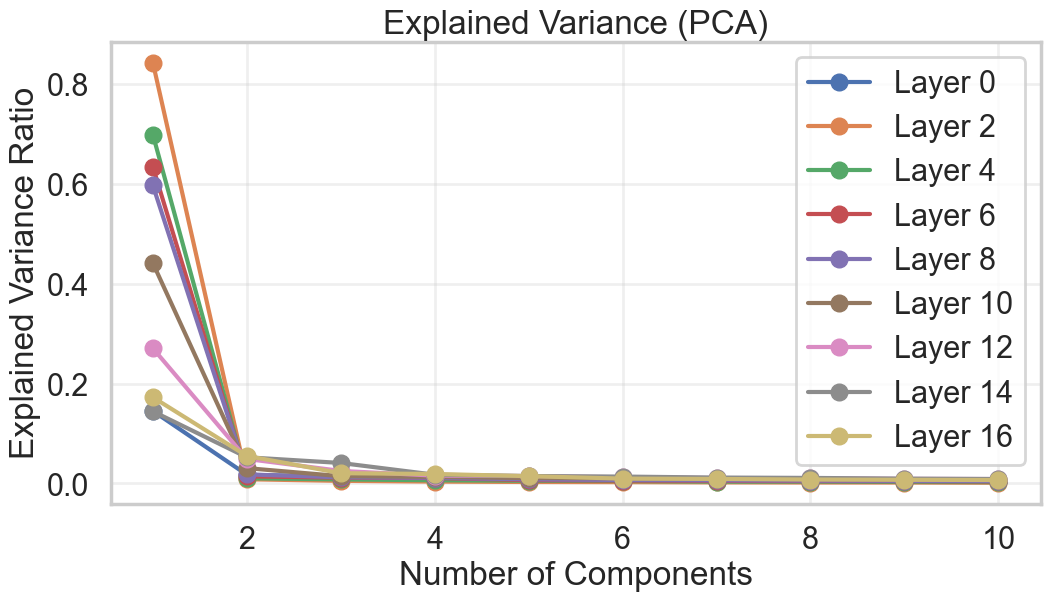

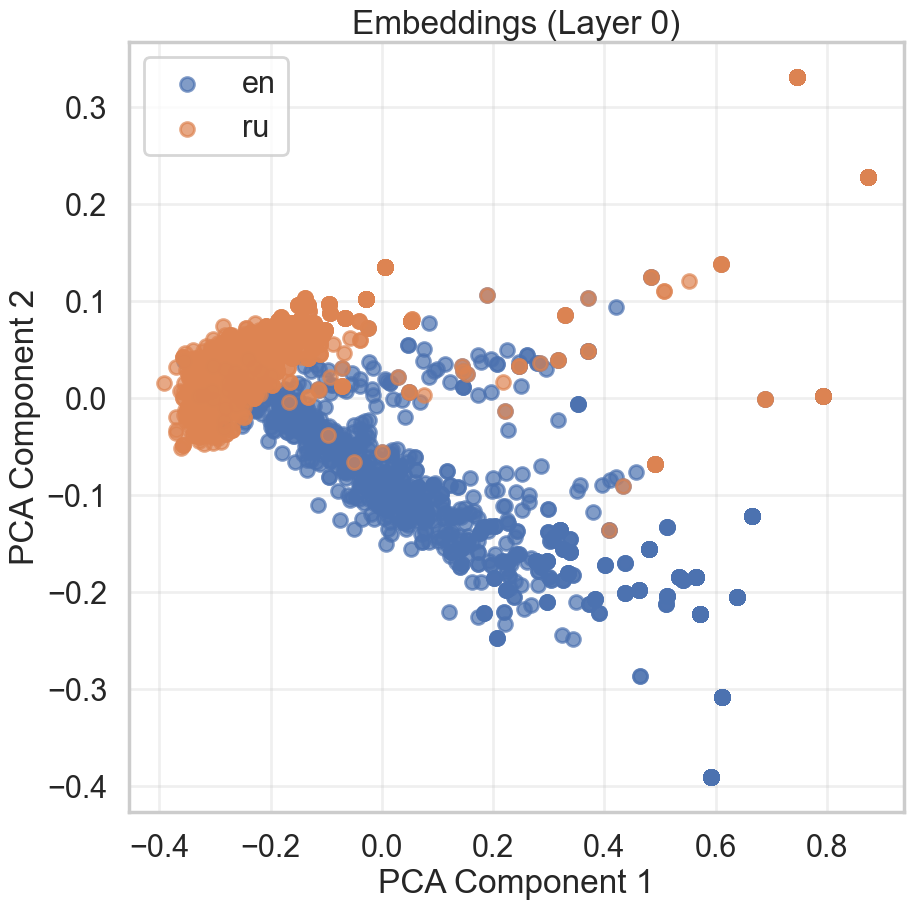

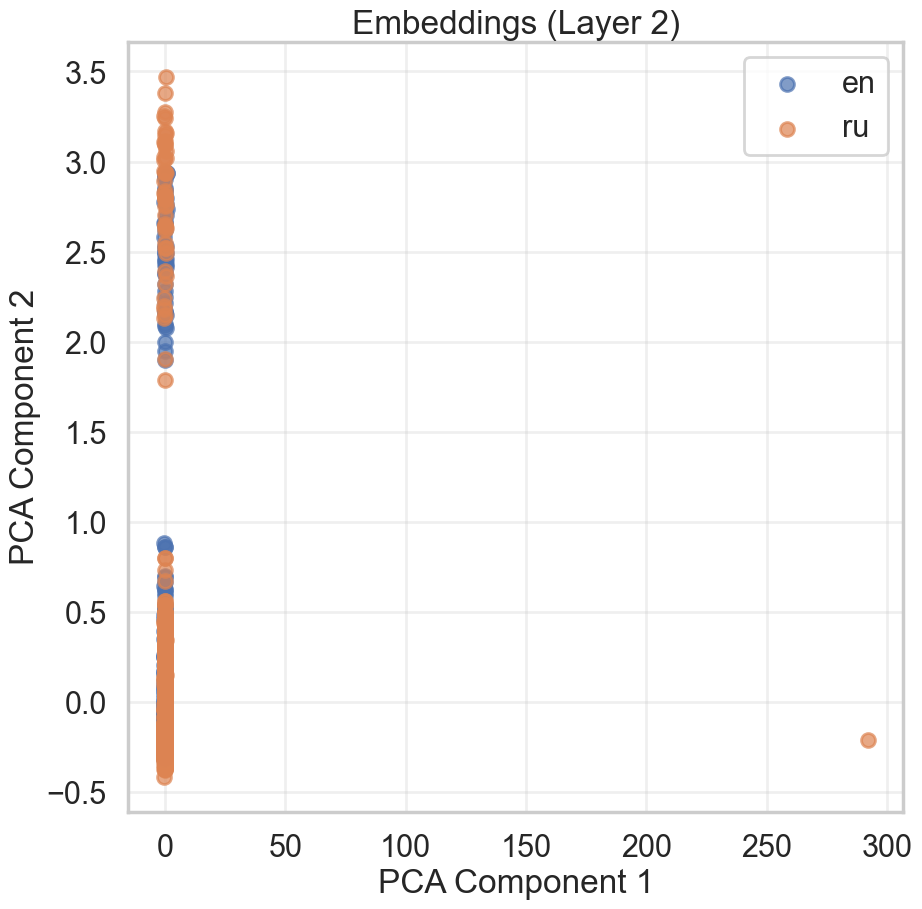

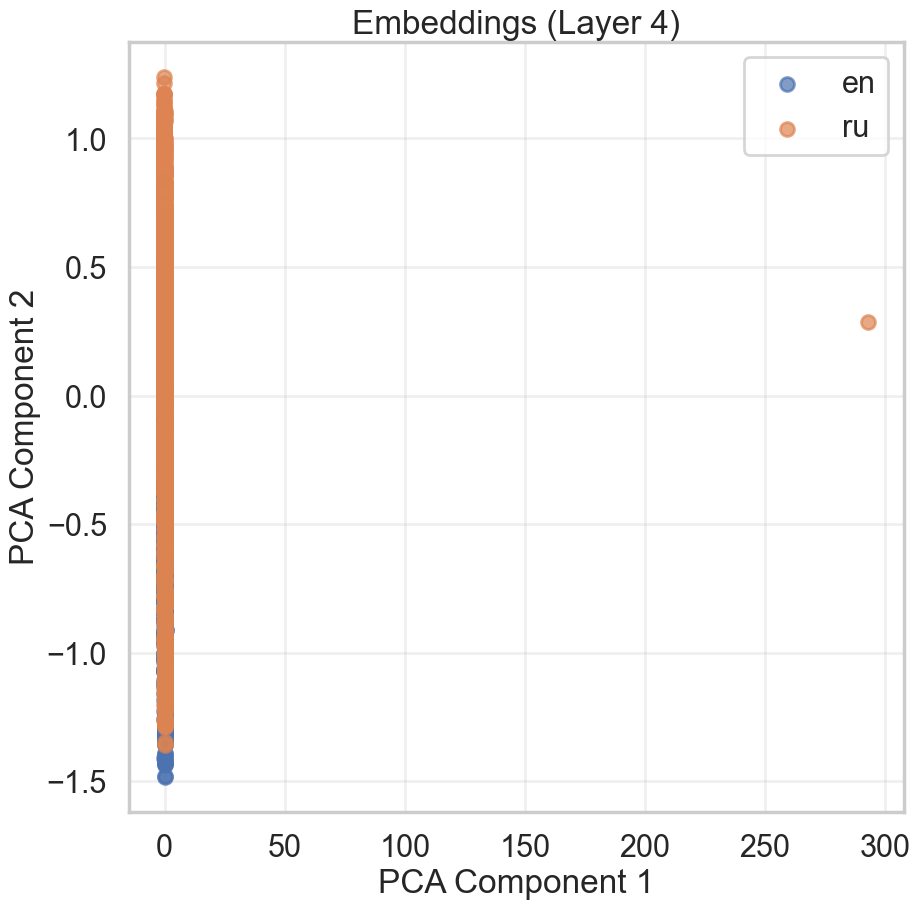

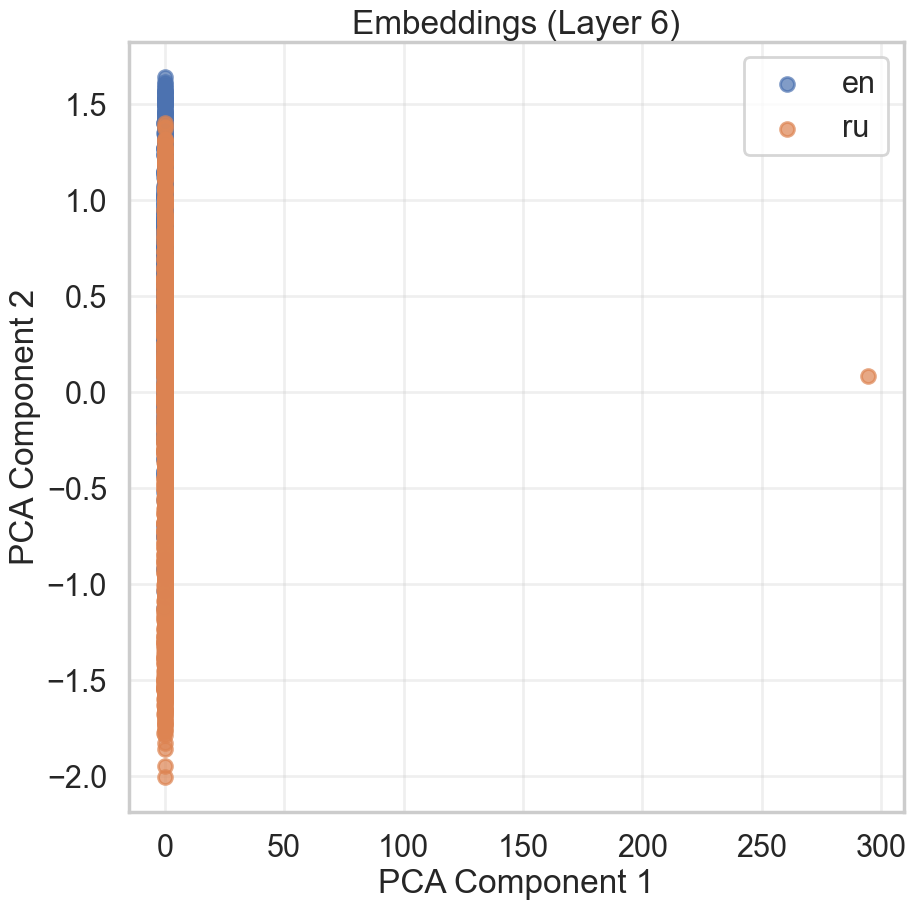

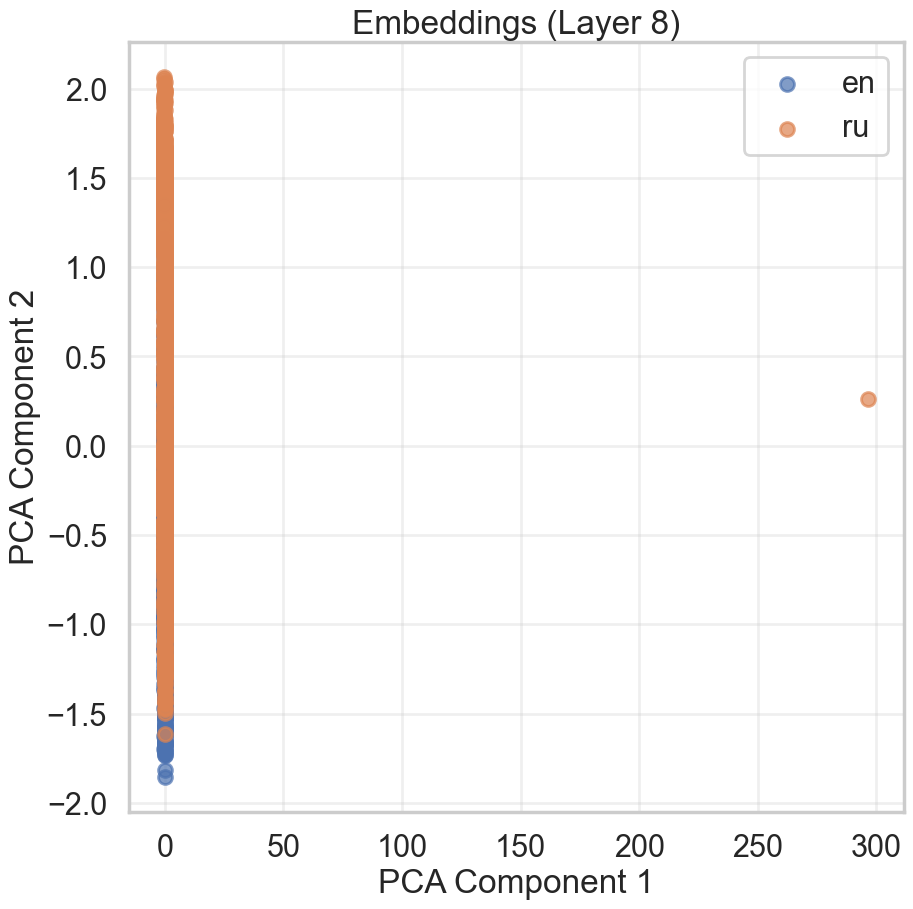

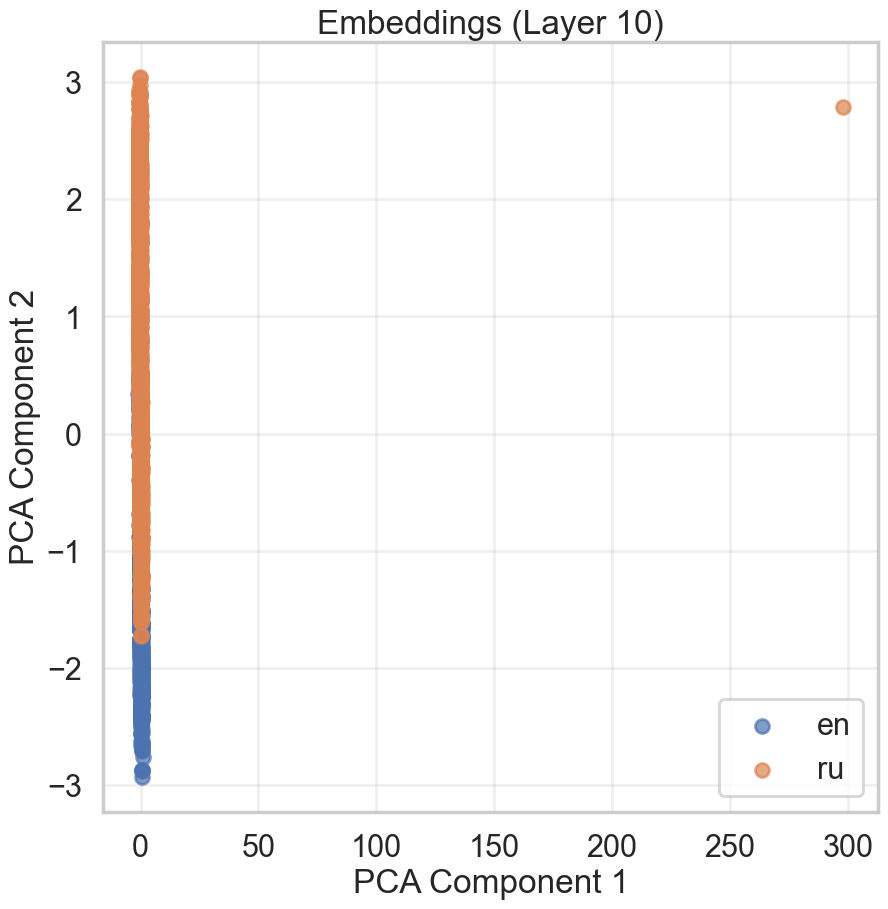

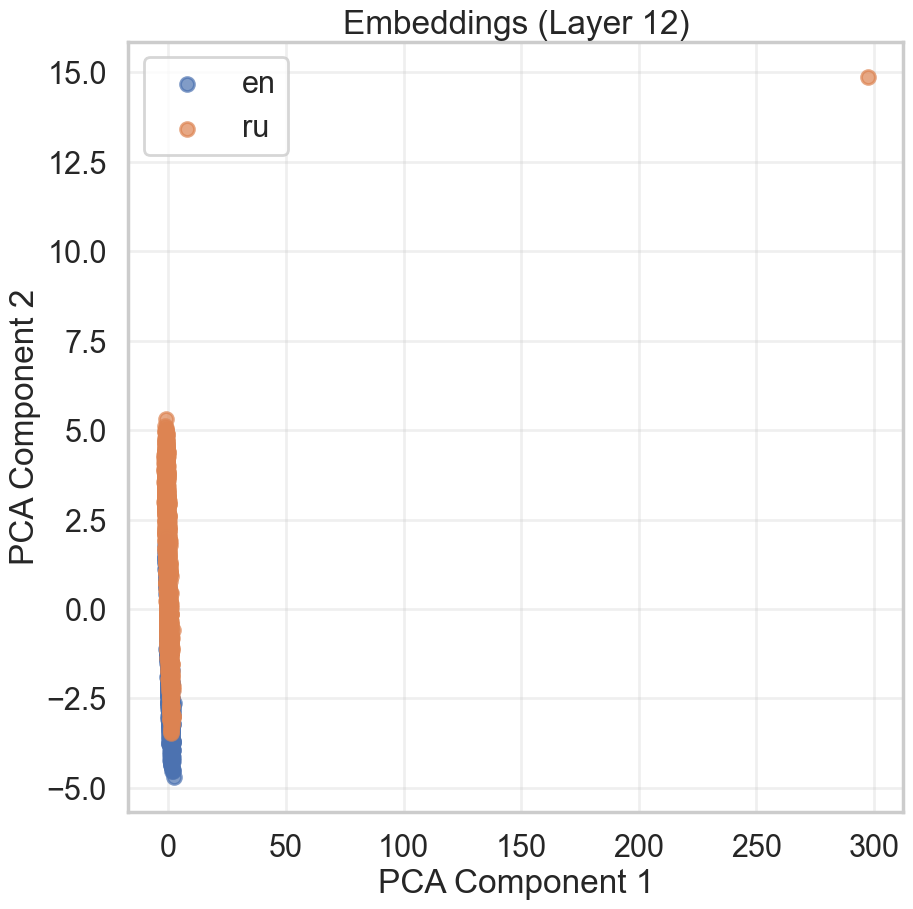

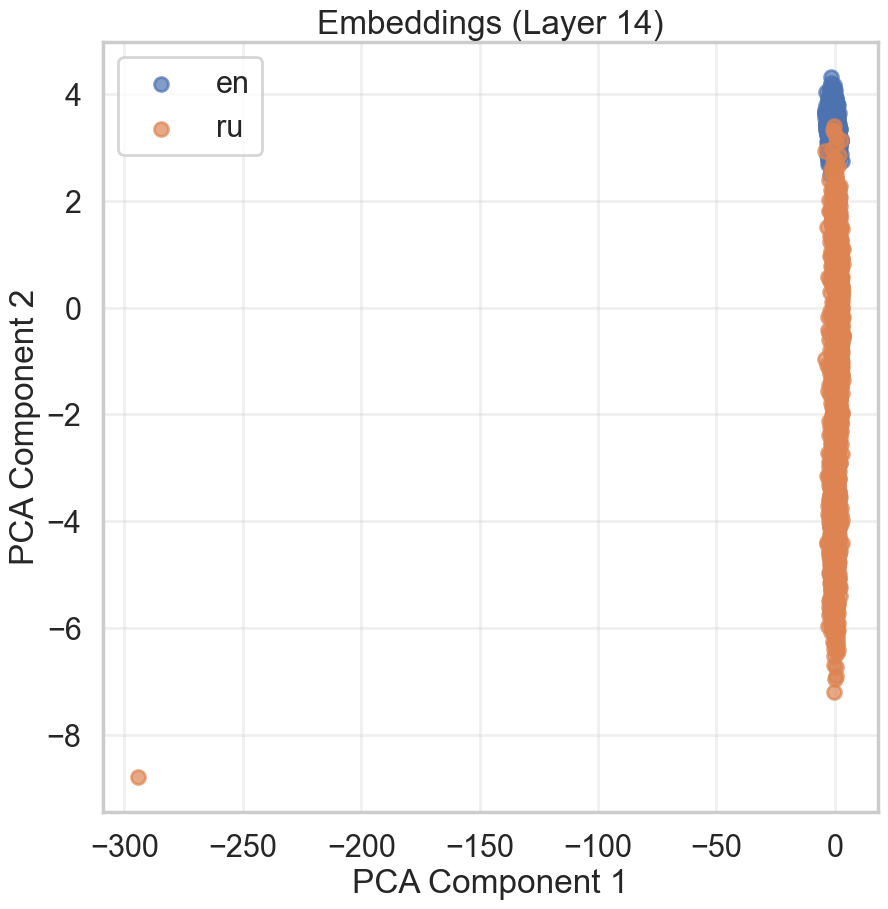

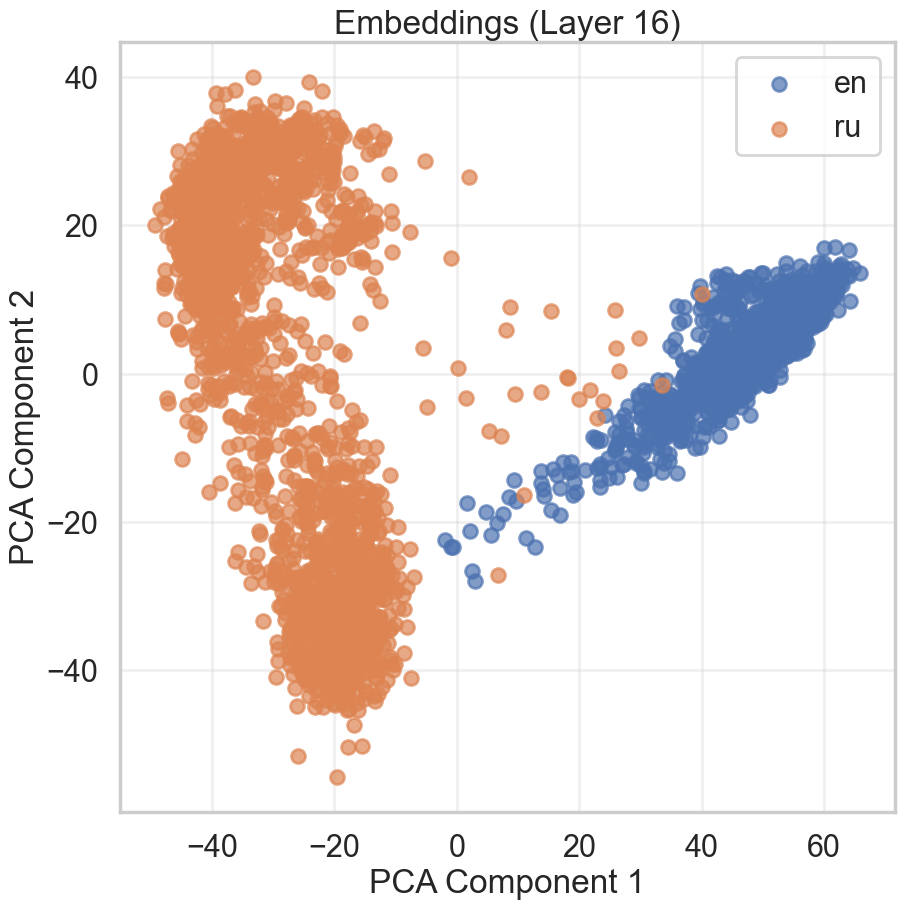

Data len:  100


 99%|█████████▉| 99/100 [01:06<00:00,  1.49it/s]


KeyboardInterrupt: 

In [ ]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language
from lexical_reflections.pca.process_hidden_space import extract_pca_components, project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance, visualize_projections
from lexical_reflections.preprocess_data.flores_plus import load_flores_plus

train_df, test_df = load_flores_plus(["eng_Latn", "rus_Cyrl"], {"eng_Latn": "en", "rus_Cyrl": "ru"}, train_size=50)

test_df = test_df[:100]

hidden_space_by_language_train = collect_hidden_space_by_language(model, tokenizer, train_df)
pca_components, pca_means, explained_variance_ratios = extract_pca_components(hidden_space_by_language_train)
visualize_explained_variance(pca_components, explained_variance_ratios)

projections_train = project_onto_pca(hidden_space_by_language_train, pca_components, pca_means)
visualize_projections(hidden_space_by_language_train, projections_train)

hidden_space_by_language_test = collect_hidden_space_by_language(model, tokenizer, test_df)
projections_test = project_onto_pca(hidden_space_by_language_test, pca_components, pca_means)
visualize_projections(hidden_space_by_language_test, projections_test)